---
## Simple linear regression <br> <font size=3.4> Dataset:newspaperData.csv<br><font size=2>Build simple linear regression model by performing Exploratory Data Analysis and do necessary transformations About Daily vs Sunday Newspaper
---

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df = pd.read_csv("/Users/Ketan/Data Science/Datasets/NewspaperData.csv")

In [20]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [21]:
df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [22]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas.util.testing as tm

In [ ]:
sns.distplot(df['sunday'])

<AxesSubplot:xlabel='daily', ylabel='sunday'>

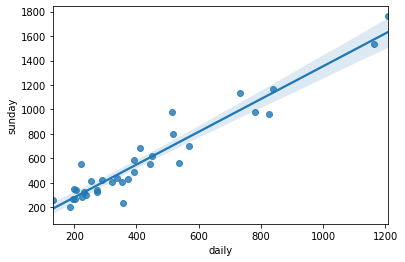

In [25]:
sns.regplot(x='daily', y='sunday', data=df)

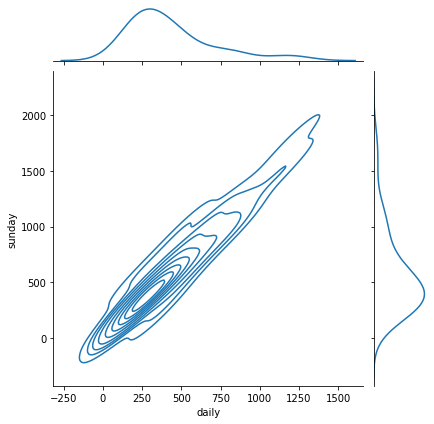

In [26]:
sns.jointplot(x='daily', y='sunday', data=df, kind='kde')

In [27]:
model = smf.ols('sunday~daily', data=df).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

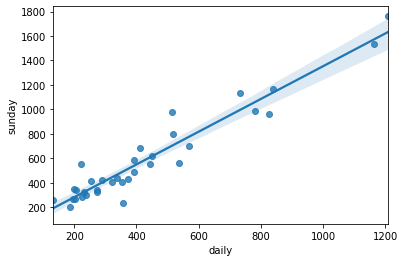

In [28]:
sns.regplot(x='daily', y='sunday', data=df)

In [29]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [30]:
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [31]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [32]:
model.rsquared

0.9180596895873295

In [33]:
model.rsquared_adj

0.9154990548869336

In [35]:
wcat = pd.read_csv("/Users/lalitmehendiratta/Downloads/Data Science/Datasets/wc-at.csv")

In [36]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

In [37]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols('AT~Waist', data=wcat).fit()

<AxesSubplot:xlabel='Waist', ylabel='AT'>

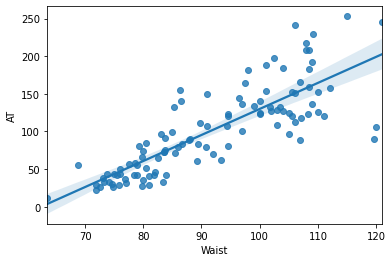

In [39]:
sns.regplot(x='Waist', y='AT', data=wcat)

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           1.62e-27
Time:                        14:08:06   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [42]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [43]:
model.tvalues

Intercept    -9.909103
Waist        14.740376
dtype: float64

In [44]:
new = pd.Series([40,75,200])

In [45]:
df = pd.DataFrame(new, columns=['Waist'])

In [46]:
model.predict(df)

0    -77.627112
1     43.432966
2    475.790390
dtype: float64

In [47]:
pred = model.predict(wcat)

In [48]:
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [49]:
Error = (wcat['AT'] - pred)

In [50]:
Error

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [51]:
final = pd.concat ([wcat, Error], axis=1)

In [52]:
final

,Waist,AT,0
0,74.75,25.72,-16.848252
1,72.60,25.89,-9.241704
2,81.80,42.60,-24.353210
3,83.95,42.80,-31.589758
4,74.65,29.84,-12.382366
...,...,...,...
104,100.10,124.00,-6.250337
105,93.30,62.20,-44.530093
106,101.80,133.00,-3.130398
107,107.90,208.00,50.770560
